In [309]:
import pandas as pd
import matplotlib.pyplot as plt

# Project 3 - Tree Data Structure Analysis
##  1. Introduction
Project 3 requires students to analyze the structure of three simple tree data structures using objects from their base class. For this project Justin Adams uses the GooglePlayStore applications csv file from Kaggle: Your Home for Data Science. https://www.kaggle.com/.:
### Splay Tree
The Splay Tree uses the localization property to speed up recurrent search times. Given that the tree contains n objects, searching for an object in a Splay Tree in the best case scenario takes O(1), which is equivalent to finding the object at the root node. On average searching for an object in a Splay Tree takes O(log(n)), which is a depth approximately equal to log(n). Due to the fact that Splay Trees can become unbalanced, the worst case search time is O(n), where n is the number of objects. However, when the number of objects is large the chances of creating this worst case scenario decreases exponentially. The primary use case for a Splay Tree is when the same object is requested repeatedly, which means the search time for finding the object the first time is O(log(n)). If the next search is the same object, then the search time is O(1).
### Adelson-Velsky and Landis Tree
The Adelson-Velsky and Landis (AVL) Tree trades off computation time during re-ordering events to reduce worst case search time. In the best case the search time is O(1), on average searching for an object takes O(log(n)), and in the worst case the search time also takes O(log(n)). However, this decreased worst case search time optimization comes at a cost. When adding or removing an element to an AVL Tree, the tree sacrifices computation time to maintain the AVL Tree - height ordering property. The height ordering property requires every parent's left and right subtree to be within ±1 depth. Thus, the time to add or remove an object from an AVL Tree becomes O(
### Binary Tree (Naive)
The Binary Tree is the simplest tree data structure. In the best case the search time is O(1), on average searching for an object takes O(log(n)), and in the worst case O(n). Due to its simplicity, it is vulnerable to becoming unbalanced. However, probability theory states that the smaller a binary tree is, the more vulnerable it is to the worst case O(n) run time.
## 2. Procedure
1. Store n custom data objects in a vector, where the number of objects n >= 1000.
2. Create at least integers [0 - n-1] in sequence, in a random order, and repeats each integer 5 times [0, 0, 0, 0, 0, 1 ... , n-2, n-1 , n-1 , n-1 , n-1, n-1]
3. Store the objects in the trees mentioned above.
4. Overload the <, >, and == operator for your custom class.
5. Pass by reference the integer depth initialized at -1, increment the value upon entering the find function, increment the value upon traversing a new depth in the tree.
6. Store the depth value and reset its value to -1.
7. Search for objects from the original vector using the different integer lists generated
8. Plot graphs of the search depths for each tree above. Do the properties of each data structure appear as emergent properties in the graphed data? Yes. See Analysis Section.
9. Create three benign objects in your vector and describe what happens when searching for these objects.
10. Cite all code and idea sources.
## 3. Data
The following graphs collate 10843 node search requests for the Splay Tree (yellow), A

In [310]:
df = pd.read_csv("TreeSearchData.csv", header = None, skiprows=1)
df = df.drop(columns={13})
df.columns=['ID', 'Splay Tree Integer Sequence', 'AVL Tree Integer Sequence', 'Binary Tree Integer Sequence', 'Splay Tree Random Sequence', 'AVL Tree Random Sequence', 'Binary Tree Random Sequence', 'Splay Tree Duplicate Integer Sequence', 'AVL Tree Duplicate Integer Sequence', 'Binary Tree Duplicate Integer Sequence', 'Splay Tree Prime Integer Sequence', 'AVL Tree Prime Integer Sequence', 'Binary Tree Prime Integer Sequence']
df.head()

,ID,Splay Tree Integer Sequence,AVL Tree Integer Sequence,Binary Tree Integer Sequence,Splay Tree Random Sequence,AVL Tree Random Sequence,Binary Tree Random Sequence,Splay Tree Duplicate Integer Sequence,AVL Tree Duplicate Integer Sequence,Binary Tree Duplicate Integer Sequence,Splay Tree Prime Integer Sequence,AVL Tree Prime Integer Sequence,Binary Tree Prime Integer Sequence
0,0,1,3,0,11,14,11,1,3,0,2,8,2
1,1,2,1,1,16,11,17,3,3,0,1,5,1
2,2,4,8,2,14,12,15,3,3,0,5,2,4
3,3,2,5,1,21,13,18,2,3,0,2,2,2
4,4,7,7,3,21,12,22,2,3,0,2,4,3


Text(0.5, 0, 'Iteration')

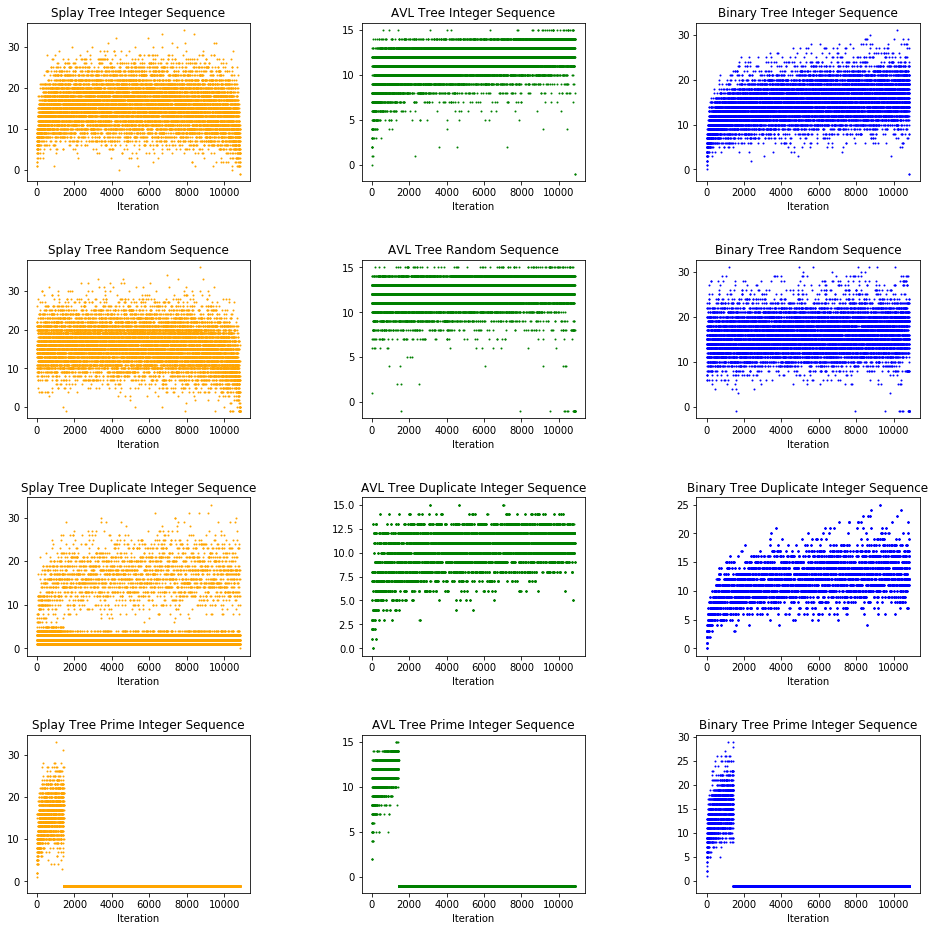

In [311]:
# Creates 12 subplots and unpack the output array immediately
fig, axes = plt.subplots(4, 3, figsize=(16,16))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
axes[0, 0].scatter(df.iloc[:,0], df.iloc[:,1], s = 1, c = 'orange')
axes[0, 0].set_title(df.columns[1])
axes[0, 0].set_xlabel('Iteration')
axes[0, 1].scatter(df.iloc[:,0], df.iloc[:,2], s = 1, c = 'green')
axes[0, 1].set_title(df.columns[2])
axes[0, 1].set_xlabel('Iteration')
axes[0, 2].scatter(df.iloc[:,0], df.iloc[:,3], s = 1, c = 'blue')
axes[0, 2].set_title(df.columns[3])
axes[0, 2].set_xlabel('Iteration')
axes[1, 0].scatter(df.iloc[:,0], df.iloc[:,4], s = 1, c = 'orange')
axes[1, 0].set_title(df.columns[4])
axes[1, 0].set_xlabel('Iteration')
axes[1, 1].scatter(df.iloc[:,0], df.iloc[:,5], s = 1, c = 'green')
axes[1, 1].set_title(df.columns[5])
axes[1, 1].set_xlabel('Iteration')
axes[1, 2].scatter(df.iloc[:,0], df.iloc[:,6], s = 1, c = 'blue')
axes[1, 2].set_title(df.columns[6])
axes[1, 2].set_xlabel('Iteration')
axes[2, 0].scatter(df.iloc[:,0], df.iloc[:,7], s = 1, c = 'orange')
axes[2, 0].set_title(df.columns[7])
axes[2, 0].set_xlabel('Iteration')
axes[2, 1].scatter(df.iloc[:,0], df.iloc[:,8], s = 1, c = 'green')
axes[2, 1].set_title(df.columns[8])
axes[2, 1].set_xlabel('Iteration')
axes[2, 2].scatter(df.iloc[:,0], df.iloc[:,9], s = 1, c = 'blue')
axes[2, 2].set_title(df.columns[9])
axes[2, 2].set_xlabel('Iteration')
axes[3, 0].scatter(df.iloc[:,0], df.iloc[:,10], s = 1, c = 'orange')
axes[3, 0].set_title(df.columns[10])
axes[3, 0].set_xlabel('Iteration')
axes[3, 1].scatter(df.iloc[:,0], df.iloc[:,11], s = 1, c = 'green')
axes[3, 1].set_title(df.columns[11])
axes[3, 1].set_xlabel('Iteration')
axes[3, 2].scatter(df.iloc[:,0], df.iloc[:,12], s = 1, c = 'blue')
axes[3, 2].set_title(df.columns[12])
axes[3, 2].set_xlabel('Iteration')

## 4. Analysis
The data above clearly demonstrates the properties of each tree. First, the splay tree in yellow demonstrates the principle of locality when making information requests to a tree data structure. Ten thousand objects are compressed to within a depth less than 35 in all cases. The tree is still vulnerable to becoming unbalanced, but given the four , Notice that the Splay Tree can only improve speed when information requests are repeated. However, when duplicate values are searched for there is massive increase in information requests.
## 5. Conclusion

## 6. Bibliography
1. Kaggle: Your Home for Data Science. https://www.kaggle.com/. Accessed 24 Oct. 2019.
2. Atkin, A. O. L., and D. J. Bernstein. “Prime Sieves Using Binary Quadratic Forms.” Mathematics of Computation, vol. 73, no. 246, Dec. 2003, pp. 1023–31. Crossref, doi:10.1090/S0025-5718-03-01501-1.
3. OpenMP Exercise. https://computing.llnl.gov/tutorials/openMP/exercise.html. Accessed 24 Oct. 2019.
